In [1]:
import pandas as pd
import pandas.io.json
import numpy as np

In [2]:
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json

def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url = ("https://financialmodelingprep.com/api/v3/financials/income-statement/AAPL")
result=get_jsonparsed_data(url)
fs=pd.DataFrame.from_dict(result)


In [3]:
from pandas.io.json import json_normalize
applfs=json_normalize(fs['financials'])


In [4]:
applfs.dtypes


date                                object
Revenue                             object
Revenue Growth                      object
Cost of Revenue                     object
Gross Profit                        object
R&D Expenses                        object
SG&A Expense                        object
Operating Expenses                  object
Operating Income                    object
Interest Expense                    object
Earnings before Tax                 object
Income Tax Expense                  object
Net Income - Non-Controlling int    object
Net Income - Discontinued ops       object
Net Income                          object
Preferred Dividends                 object
Net Income Com                      object
EPS                                 object
EPS Diluted                         object
Weighted Average Shs Out            object
Weighted Average Shs Out (Dil)      object
Dividend per Share                  object
Gross Margin                        object
EBITDA Marg

In [5]:
list(applfs.columns) 

['date',
 'Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin']

In [6]:
applfs[['Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin']] = applfs[['Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin']].apply(pd.to_numeric)

In [7]:
applfs.dtypes


date                                 object
Revenue                             float64
Revenue Growth                      float64
Cost of Revenue                     float64
Gross Profit                        float64
R&D Expenses                        float64
SG&A Expense                        float64
Operating Expenses                  float64
Operating Income                    float64
Interest Expense                    float64
Earnings before Tax                 float64
Income Tax Expense                  float64
Net Income - Non-Controlling int    float64
Net Income - Discontinued ops       float64
Net Income                          float64
Preferred Dividends                 float64
Net Income Com                      float64
EPS                                 float64
EPS Diluted                         float64
Weighted Average Shs Out            float64
Weighted Average Shs Out (Dil)      float64
Dividend per Share                  float64
Gross Margin                    

In [8]:
pd.options.display.float_format = '{:.2f}'.format
applfs['date'] =  pd.to_datetime(applfs['date'],dayfirst=False).dt.strftime("%Y")

In [9]:
applfs

,date,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin
0,2019,260174000000.00,0.00,161782000000.00,98392000000.00,16217000000.00,18245000000.00,34462000000.00,63930000000.00,3576000000.00,...,0.38,0.29,0.25,0.21,0.23,76477000000.00,63930000000.00,55256000000.00,0.25,0.21
1,2018,265595000000.00,0.00,163756000000.00,101839000000.00,14236000000.00,16705000000.00,30941000000.00,70898000000.00,3240000000.00,...,0.38,0.31,0.27,0.22,0.24,81801000000.00,70898000000.00,59531000000.00,0.27,0.22
2,2017,229234000000.00,0.00,141048000000.00,88186000000.00,11581000000.00,15261000000.00,26842000000.00,61344000000.00,2323000000.00,...,0.38,0.31,0.27,0.21,0.22,71501000000.00,61344000000.00,48351000000.00,0.28,0.21
3,2016,215639000000.00,0.00,131376000000.00,84263000000.00,10045000000.00,14194000000.00,24239000000.00,60024000000.00,1456000000.00,...,0.39,0.33,0.28,0.21,0.25,70529000000.00,60024000000.00,45687000000.00,0.28,0.21
4,2015,233715000000.00,0.00,140089000000.00,93626000000.00,8067000000.00,14329000000.00,22396000000.00,71230000000.00,733000000.00,...,0.40,0.35,0.30,0.23,0.30,82487000000.00,71230000000.00,53394000000.00,0.31,0.23
5,2014,182795000000.00,0.00,112258000000.00,70537000000.00,6041000000.00,11993000000.00,18034000000.00,52503000000.00,384000000.00,...,0.39,0.33,0.29,0.22,0.27,60449000000.00,52503000000.00,39510000000.00,0.29,0.22
6,2013,170910000000.00,0.00,106606000000.00,64304000000.00,4475000000.00,10830000000.00,15305000000.00,48999000000.00,136000000.00,...,0.38,0.33,0.29,0.22,0.27,55756000000.00,48999000000.00,37037000000.00,0.29,0.22
7,2012,156508000000.00,0.00,87846000000.00,68662000000.00,3381000000.00,10040000000.00,13421000000.00,55241000000.00,0.00,...,0.44,0.37,0.35,0.27,0.27,58518000000.00,55241000000.00,41733000000.00,0.36,0.27
8,2011,108249000000.00,0.00,64431000000.00,43818000000.00,2429000000.00,7599000000.00,10028000000.00,33790000000.00,0.00,...,0.40,0.33,0.31,0.24,0.31,35604000000.00,33790000000.00,25922000000.00,0.32,0.24
9,2010,65225000000.00,0.00,39541000000.00,25684000000.00,1782000000.00,5517000000.00,7299000000.00,18385000000.00,0.00,...,0.39,0.30,0.28,0.21,0.25,19412000000.00,18385000000.00,14013000000.00,0.28,0.21


In [10]:
url1 = ("https://financialmodelingprep.com/api/v3/financials/balance-sheet-statement/AAPL")
result=get_jsonparsed_data(url1)
bs=pd.DataFrame.from_dict(result)

from pandas.io.json import json_normalize
applbs=json_normalize(bs['financials'])
applbs


,date,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities
0,2019-09-28,48844000000.0,51713000000.0,1.00557e+11,22926000000.0,4106000000.0,1.62819e+11,37378000000.0,0.0,1.05341e+11,...,0.0,1.4231e+11,2.48028e+11,40730764000,45898000000.0,90488000000.0,1.57054e+11,53223000000.0,0.0,0.0
1,2018-09-29,25913000000.0,40388000000.0,66301000000.0,23186000000.0,3956000000.0,1.31339e+11,41304000000.0,0.0,1.70799e+11,...,0.0,1.41712e+11,2.58578e+11,35446014000,70400000000.0,1.07147e+11,2.11187e+11,76606000000.0,0.0,0.0
2,2017-09-30,20289000000.0,53892000000.0,74181000000.0,17874000000.0,4855000000.0,1.28645e+11,33783000000.0,8015000000.0,1.94714e+11,...,0.0,1.71962e+11,2.41272e+11,30740799000,98330000000.0,1.34047e+11,2.48606e+11,83414000000.0,0.0,0.0
3,2016-09-24,20484000000.0,46671000000.0,67155000000.0,15754000000.0,2132000000.0,1.06869e+11,27010000000.0,8620000000.0,1.7043e+11,...,0.0,1.4045e+11,1.93437e+11,25914834000,96364000000.0,1.28249e+11,2.17101e+11,58443000000.0,0.0,0.0
4,2015-09-26,21120000000.0,20481000000.0,41601000000.0,16849000000.0,2349000000.0,89378000000.0,22471000000.0,9009000000.0,1.64065e+11,...,0.0,1.14576e+11,1.71124e+11,21837247000,92284000000.0,1.19355e+11,1.84546e+11,34843000000.0,0.0,0.0
5,2014-09-27,13844000000.0,11233000000.0,25077000000.0,17460000000.0,2111000000.0,68531000000.0,20624000000.0,8758000000.0,1.30162e+11,...,0.0,61162000000.0,1.20292e+11,17446839000,87152000000.0,1.11547e+11,1.41395e+11,21451000000.0,0.0,0.0
6,2013-09-28,14259000000.0,26287000000.0,40546000000.0,13102000000.0,1764000000.0,73286000000.0,16597000000.0,5756000000.0,1.06215e+11,...,0.0,43246000000.0,83451000000.0,0.0,1.04256e+11,1.23549e+11,1.32502e+11,2701000000.0,0.0,0.0
7,2012-09-29,10746000000.0,18383000000.0,29129000000.0,10930000000.0,791000000.0,57653000000.0,15452000000.0,5359000000.0,92122000000.0,...,0.0,21895000000.0,57854000000.0,0.0,1.01289e+11,1.1821e+11,1.10505e+11,-10746000000.0,0.0,0.0
8,2011-09-24,9815000000.0,16137000000.0,25952000000.0,5369000000.0,776000000.0,44988000000.0,7777000000.0,4432000000.0,55618000000.0,...,0.0,13800000000.0,39756000000.0,0.0,62841000000.0,76615000000.0,71755000000.0,-9815000000.0,0.0,0.0
9,2010-09-25,11261000000.0,14359000000.0,25620000000.0,5510000000.0,1051000000.0,41678000000.0,4768000000.0,1083000000.0,25391000000.0,...,0.0,8306000000.0,27392000000.0,0.0,37169000000.0,47791000000.0,39750000000.0,-11261000000.0,0.0,0.0


In [11]:
list(applbs.columns) 

['date',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total current liabilities',
 'Long-term debt',
 'Total debt',
 'Deferred revenue',
 'Tax Liabilities',
 'Deposit Liabilities',
 'Total non-current liabilities',
 'Total liabilities',
 'Other comprehensive income',
 'Retained earnings (deficit)',
 'Total shareholders equity',
 'Investments',
 'Net Debt',
 'Other Assets',
 'Other Liabilities']

In [12]:
applbs[['Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total current liabilities',
 'Long-term debt',
 'Total debt',
 'Deferred revenue',
 'Tax Liabilities',
 'Deposit Liabilities',
 'Total non-current liabilities',
 'Total liabilities',
 'Other comprehensive income',
 'Retained earnings (deficit)',
 'Total shareholders equity',
 'Investments',
 'Net Debt',
 'Other Assets',
 'Other Liabilities']] = applbs[['Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total current liabilities',
 'Long-term debt',
 'Total debt',
 'Deferred revenue',
 'Tax Liabilities',
 'Deposit Liabilities',
 'Total non-current liabilities',
 'Total liabilities',
 'Other comprehensive income',
 'Retained earnings (deficit)',
 'Total shareholders equity',
 'Investments',
 'Net Debt',
 'Other Assets',
 'Other Liabilities']].apply(pd.to_numeric)

In [13]:
applbs.dtypes


date                                object
Cash and cash equivalents          float64
Short-term investments             float64
Cash and short-term investments    float64
Receivables                        float64
Inventories                        float64
Total current assets               float64
Property, Plant & Equipment Net    float64
Goodwill and Intangible Assets     float64
Long-term investments              float64
Tax assets                         float64
Total non-current assets           float64
Total assets                       float64
Payables                           float64
Short-term debt                    float64
Total current liabilities          float64
Long-term debt                     float64
Total debt                         float64
Deferred revenue                   float64
Tax Liabilities                    float64
Deposit Liabilities                float64
Total non-current liabilities      float64
Total liabilities                  float64
Other compr

In [14]:
applbs['date'] =  pd.to_datetime(applbs['date'],dayfirst=False).dt.strftime("%Y")

In [15]:

applbs

,date,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities
0,2019,48844000000.00,51713000000.00,100557000000.00,22926000000.00,4106000000.00,162819000000.00,37378000000.00,0.00,105341000000.00,...,0.00,142310000000.00,248028000000.00,40730764000.00,45898000000.00,90488000000.00,157054000000.00,53223000000.00,0.00,0.00
1,2018,25913000000.00,40388000000.00,66301000000.00,23186000000.00,3956000000.00,131339000000.00,41304000000.00,0.00,170799000000.00,...,0.00,141712000000.00,258578000000.00,35446014000.00,70400000000.00,107147000000.00,211187000000.00,76606000000.00,0.00,0.00
2,2017,20289000000.00,53892000000.00,74181000000.00,17874000000.00,4855000000.00,128645000000.00,33783000000.00,8015000000.00,194714000000.00,...,0.00,171962000000.00,241272000000.00,30740799000.00,98330000000.00,134047000000.00,248606000000.00,83414000000.00,0.00,0.00
3,2016,20484000000.00,46671000000.00,67155000000.00,15754000000.00,2132000000.00,106869000000.00,27010000000.00,8620000000.00,170430000000.00,...,0.00,140450000000.00,193437000000.00,25914834000.00,96364000000.00,128249000000.00,217101000000.00,58443000000.00,0.00,0.00
4,2015,21120000000.00,20481000000.00,41601000000.00,16849000000.00,2349000000.00,89378000000.00,22471000000.00,9009000000.00,164065000000.00,...,0.00,114576000000.00,171124000000.00,21837247000.00,92284000000.00,119355000000.00,184546000000.00,34843000000.00,0.00,0.00
5,2014,13844000000.00,11233000000.00,25077000000.00,17460000000.00,2111000000.00,68531000000.00,20624000000.00,8758000000.00,130162000000.00,...,0.00,61162000000.00,120292000000.00,17446839000.00,87152000000.00,111547000000.00,141395000000.00,21451000000.00,0.00,0.00
6,2013,14259000000.00,26287000000.00,40546000000.00,13102000000.00,1764000000.00,73286000000.00,16597000000.00,5756000000.00,106215000000.00,...,0.00,43246000000.00,83451000000.00,0.00,104256000000.00,123549000000.00,132502000000.00,2701000000.00,0.00,0.00
7,2012,10746000000.00,18383000000.00,29129000000.00,10930000000.00,791000000.00,57653000000.00,15452000000.00,5359000000.00,92122000000.00,...,0.00,21895000000.00,57854000000.00,0.00,101289000000.00,118210000000.00,110505000000.00,-10746000000.00,0.00,0.00
8,2011,9815000000.00,16137000000.00,25952000000.00,5369000000.00,776000000.00,44988000000.00,7777000000.00,4432000000.00,55618000000.00,...,0.00,13800000000.00,39756000000.00,0.00,62841000000.00,76615000000.00,71755000000.00,-9815000000.00,0.00,0.00
9,2010,11261000000.00,14359000000.00,25620000000.00,5510000000.00,1051000000.00,41678000000.00,4768000000.00,1083000000.00,25391000000.00,...,0.00,8306000000.00,27392000000.00,0.00,37169000000.00,47791000000.00,39750000000.00,-11261000000.00,0.00,0.00


In [16]:
simple_dupont=pd.DataFrame(columns=['date','Net Profit Margin','Assets Turnover','Equity Multiplier','ROE'])
simple_dupont['date']=applfs['date']
simple_dupont['Net Profit Margin']=applfs['Net Profit Margin']
simple_dupont['Assets Turnover']=applfs['Revenue']/applbs['Total assets']
simple_dupont['Equity Multiplier']=applbs['Total assets']/(applbs['Total assets']-applbs['Total liabilities'])
simple_dupont['ROE']=simple_dupont['Net Profit Margin']*simple_dupont['Assets Turnover']*simple_dupont['Equity Multiplier']
format_dict = { 'Net Profit Margin': '{:.2%}','ROE': '{:.2%}'}
simple_dupont = simple_dupont.sort_values(by="date")
simple_dupont.style.format(format_dict).hide_index().background_gradient(subset=['ROE'], cmap='BuGn').background_gradient(subset=['Net Profit Margin'], cmap='Blues').background_gradient(subset=['Assets Turnover'], cmap='Oranges').background_gradient(subset=['Equity Multiplier'], cmap='Reds')

date,Net Profit Margin,Assets Turnover,Equity Multiplier,ROE
2009,19.19%,0.903244,1.5013,26.02%
2010,21.48%,0.86755,1.57316,29.32%
2011,23.95%,0.930206,1.51891,33.83%
2012,26.67%,0.888927,1.48942,35.30%
2013,21.67%,0.825652,1.67545,29.98%
2014,21.61%,0.788457,2.0784,35.42%
2015,22.85%,0.804585,2.43374,44.74%
2016,21.19%,0.67034,2.50829,35.62%
2017,21.09%,0.610771,2.79991,36.07%
2018,22.41%,0.726215,3.4133,55.56%


The Assets Turnover has gone down since 2009 and slowly increases since 2017. Which shows that assets are being more efficiently used since 2017. Equity Multiplier has grown significantly, which shows amount of debt and lower Stakeholders Equity in Company. Net Profit Margin is very stable- the amount of profit after expenses. The high ROE is mostly based on higher equity multiplier and not higher net profit margin or assets turnover.

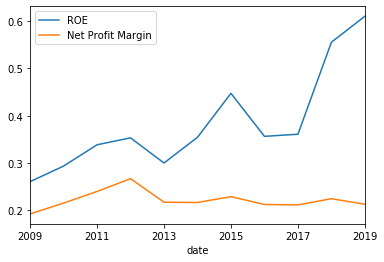

In [17]:
simple_dupont.plot(x='date',y=['ROE','Net Profit Margin'])